<a href="https://colab.research.google.com/github/nazalnihad/AutoSudoku/blob/main/sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('/content/drive/MyDrive/sudoku_img.png')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray_image,(5,5),1)
thresh_hold = cv2.adaptiveThreshold(blur,255,1,1,11,2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
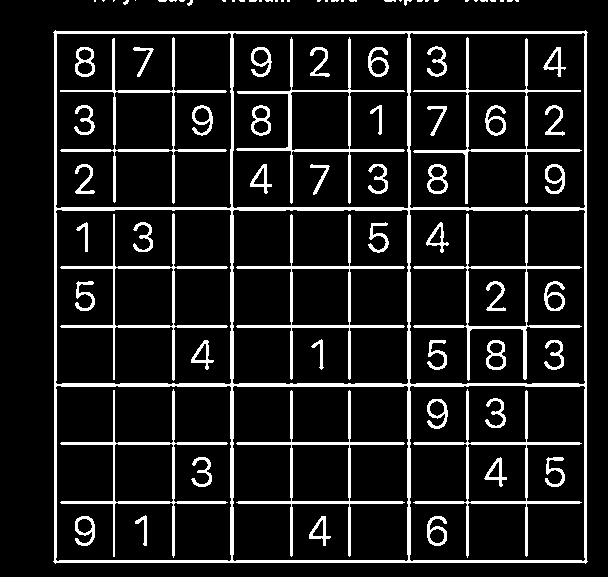

In [ ]:
thresh_hold

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
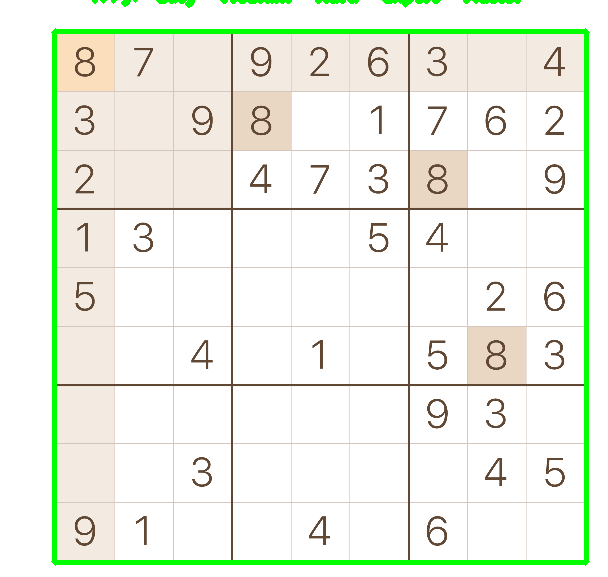

In [ ]:
img_with_contour = img.copy()
img_big_contour = img.copy()
contours , hierarchy = cv2.findContours(thresh_hold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_with_contour,contours,-1,(0,255,0),3)

In [ ]:
def largestContour(contours):
  largest = np.array([])
  max_area = 0

  for i in contours:
    area = cv2.contourArea(i)

    if area>50:
      peri = cv2.arcLength(i,True)
      approx = cv2.approxPolyDP(i,0.02*peri,True)

      if area > max_area and len(approx)==4:
        largest = approx
        max_area = area
  return largest , max_area

In [ ]:
def reorder(points):
  points = points.reshape((4,2))
  newPoints = np.zeros((4,1,2),dtype=np.int32)
  add = points.sum(1)
  newPoints[0]=points[np.argmin(add)]
  newPoints[3]=points[np.argmax(add)]
  diff = np.diff(points,axis=1)
  newPoints[1]=points[np.argmin(diff)]
  newPoints[2]=points[np.argmax(diff)]

  return newPoints

In [ ]:
widthImg = 450
heightImg = 450

In [ ]:
biggest , maxArea = largestContour(contours)
print(biggest)

if biggest.size!=0:
  biggest = reorder(biggest)
  cv2.drawContours(img_big_contour,biggest,-1,(0,0,255),20)
  pts1 = np.float32(biggest)
  pts2 = np.float32([[0,0],[widthImg,0],[0,heightImg],[widthImg,heightImg]])
  matrix = cv2.getPerspectiveTransform(pts1,pts2)
  imgWarpColored = cv2.warpPerspective(img,matrix,(widthImg,heightImg))
  # imgDetectedDigits = imgBlank.copy()
  imgWarpColored = cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)

[[[ 55  30]]

 [[ 53 561]]

 [[585 563]]

 [[587  32]]]


In [ ]:
def splitBoxes(img):
  rows = np.vsplit(img,9)
  boxes = []
  for r in rows:
    cols = np.hsplit(r,9)
    for box in cols:
      boxes.append(box)
  return boxes

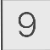

In [ ]:
boxes = splitBoxes(imgWarpColored)
cv2_imshow(boxes[72])

In [ ]:
from PIL import Image

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Show some predictions
for i in range(10):
    print("Predicted:", predicted_labels[i], "Actual:", y_test[i])


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2937 - accuracy: 0.9138 - val_loss: 0.1416 - val_accuracy: 0.9600
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1425 - accuracy: 0.9577 - val_loss: 0.1000 - val_accuracy: 0.9710
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1073 - accuracy: 0.9677 - val_loss: 0.0848 - val_accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0874 - accuracy: 0.9732 - val_loss: 0.0839 - val_accuracy: 0.9758
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0748 - accuracy: 0.9765 - val_loss: 0.0722 - val_accuracy: 0.9779
313/313 - 1s - loss: 0.0722 - accuracy: 0.9779 - 509ms/epoch - 2ms/step

Test accuracy: 0.9779000282287598
313/313 [==============================] - 1s 2ms/step
Predicted: 7 Actual: 7
Predicted: 2 Actual: 2
Predicted: 

array([[214,  69, 146, ..., 207, 207, 207],
       [214,  69, 155, ..., 233, 233, 233],
       [214,  69, 150, ..., 233, 233, 233],
       ...,
       [255,  69, 123, ..., 233, 233, 233],
       [255,  69, 123, ..., 233, 233, 233],
       [255,  69, 122, ..., 209, 209, 209]], dtype=uint8)
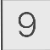

In [ ]:
boxes[72]

In [ ]:
img = Image.fromarray(boxes[72]).convert('L')  # Convert to grayscale
img = img.resize((28, 28), Image.ANTIALIAS)
img_array = np.array(img) / 255.0  # Normalize pixel values
img_array = img_array.reshape((1, 28, 28))
model.predict(img_array)
predicted_labels = np.argmax(predictions)
predicted_labels

1/1 [==============================] - 0s 22ms/step


<ipython-input-43-a0141e1618bf>:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((28, 28), Image.ANTIALIAS)


72

In [ ]:
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model (skip this step if you already have a trained model)
# model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Preprocess your boxes and predict


In [ ]:

img_72 = boxes[72]
img = Image.fromarray(img_72)
resized_img = img.resize((28, 28), Image.ANTIALIAS)
reshaped_img_72 = np.array(resized_img)

reshaped_img_72


<ipython-input-56-58e0f6b9d9f3>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize((28, 28), Image.ANTIALIAS)


array([[142, 147, 225, 214, 216, 216, 216, 216, 216, 216, 217, 217, 217,
        217, 217, 217, 217, 217, 218, 218, 218, 218, 218, 218, 218, 218,
        219, 219],
       [141, 153, 245, 233, 235, 235, 235, 235, 235, 235, 235, 235, 235,
        235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235,
        235, 235],
       [142, 152, 242, 230, 232, 232, 232, 232, 232, 232, 233, 233, 233,
        233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233,
        233, 233],
       [144, 152, 243, 231, 233, 233, 233, 233, 233, 233, 233, 233, 233,
        233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233,
        233, 233],
       [144, 151, 243, 231, 233, 233, 233, 233, 233, 233, 233, 233, 233,
        232, 231, 231, 232, 233, 233, 233, 233, 233, 233, 233, 233, 233,
        233, 233],
       [144, 149, 243, 231, 233, 233, 233, 233, 233, 233, 233, 232, 232,
        238, 244, 243, 237, 232, 233, 233, 233, 233, 233, 233, 233, 233,
        233, 233],
       [145, 149, 243, 231, 233, 233, 233, 233, 233, 233, 232, 236, 238,
        207, 175, 176, 211, 240, 234, 232, 233, 233, 233, 233, 233, 233,
        233, 233],
       [147, 149, 243, 231, 233, 233, 233, 233, 233, 232, 237, 220, 124,
         84,  87,  85,  84, 141, 234, 234, 233, 233, 233, 233, 233, 233,
        233, 233],
       [147, 149, 243, 231, 233, 233, 233, 233, 232, 235, 228,  99,  84,
        197, 223, 222, 188,  83, 132, 240, 232, 233, 233, 233, 233, 233,
        233, 233],
       [147, 146, 243, 231, 233, 233, 233, 233, 231, 241, 161,  72, 215,
        245, 234, 234, 248, 194,  66, 196, 240, 231, 233, 233, 233, 233,
        233, 233],
       [148, 146, 243, 231, 233, 233, 233, 233, 232, 241, 124, 120, 248,
        229, 232, 232, 231, 239, 109, 132, 240, 232, 233, 233, 233, 233,
        233, 233],
       [150, 146, 244, 231, 233, 233, 233, 233, 232, 241, 131, 133, 241,
        231, 233, 233, 229, 247, 144,  88, 230, 235, 232, 233, 233, 233,
        233, 233],
       [150, 146, 243, 231, 233, 233, 233, 233, 232, 242, 129,  97, 244,
        231, 231, 230, 235, 233,  90,  93, 227, 235, 232, 233, 233, 233,
        233, 233],
       [150, 144, 243, 231, 233, 233, 233, 233, 232, 239, 186,  68, 172,
        246, 244, 246, 239, 146,  82, 106, 225, 235, 232, 233, 233, 233,
        233, 233],
       [151, 143, 243, 231, 233, 233, 233, 233, 233, 233, 237, 145,  68,
        127, 168, 166, 109, 119, 141,  93, 228, 235, 232, 233, 233, 233,
        233, 233],
       [153, 143, 244, 231, 233, 233, 233, 233, 233, 233, 234, 238, 194,
        115, 115, 110, 146, 246, 147,  82, 228, 235, 232, 233, 233, 233,
        233, 233],
       [153, 143, 244, 231, 233, 233, 233, 233, 233, 233, 231, 235, 240,
        246, 246, 247, 243, 242, 118, 121, 238, 233, 233, 233, 233, 233,
        233, 233],
       [153, 141, 244, 231, 233, 233, 233, 233, 232, 238, 194, 146, 232,
        231, 228, 227, 238, 212,  69, 176, 243, 231, 233, 233, 233, 233,
        233, 233],
       [155, 139, 244, 231, 233, 233, 233, 233, 232, 238, 205,  63, 147,
        247, 242, 244, 236, 111,  96, 232, 233, 233, 233, 233, 233, 233,
        233, 233],
       [156, 139, 244, 231, 233, 233, 233, 233, 233, 232, 238, 169,  66,
        120, 149, 143, 104,  86, 200, 239, 232, 233, 233, 233, 233, 233,
        233, 233],
       [156, 139, 244, 231, 233, 233, 233, 233, 233, 233, 233, 240, 193,
        135,  94,  96, 153, 220, 238, 231, 233, 233, 233, 233, 233, 233,
        233, 233],
       [156, 138, 244, 231, 233, 233, 233, 233, 233, 233, 233, 232, 240,
        241, 234, 235, 241, 236, 232, 233, 233, 233, 233, 233, 233, 233,
        233, 233],
       [158, 137, 244, 231, 233, 233, 233, 233, 233, 233, 233, 233, 231,
        232, 233, 233, 231, 232, 233, 233, 233, 233, 233, 233, 233, 233,
        233, 233],
       [159, 137, 244, 231, 233, 233, 233, 233, 233, 233, 233, 233, 233,
        233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233,
        233, 233],
       [159, 136, 243, 231, 233, 233, 23

In [ ]:
predictions = []
for box in boxes:
    # Assuming 'box' is a numpy array containing the image data
    img = Image.fromarray(box)
    resized_img = img.resize((28, 28), Image.ANTIALIAS)
    reshaped_img = np.array(resized_img).reshape(1, 28, 28, 1)  # Add batch_size and channels dimensions
    prediction = model.predict(reshaped_img)
    predictions.append(prediction)  # Append the prediction for the single image

# Print the predictions
for i, prediction in enumerate(predictions):
    max_index = np.argmax(prediction)
    print(f"Image {i}: Predicted digit {max_index}")

1/1 [==============================] - 0s 21ms/step


<ipython-input-60-fd1e078f8835>:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize((28, 28), Image.ANTIALIAS)


1/1 [==============================] - 0s 21ms/step
Image 0: Predicted digit 0
Image 1: Predicted digit 0
Image 2: Predicted digit 0
Image 3: Predicted digit 0
Image 4: Predicted digit 0
Image 5: Predicted digit 0
Image 6: Predicted digit 0
Image 7: Predicted digit 0
Image 8: Predicted digit 0
Image 9: Predicted digit 0
Image 10: Predicted digit 0
Image 11: Predicted digit 0
Image 12: Predicted digit 0
Image 13: Predicted digit 0
Image 14: Predicted digit 0
Image 15: Predicted digit 0
Image 16: Predicted digit 0
Image 17: Predicted digit 0
Image 18: Predicted digit 0
Image 19: Predicted digit 0
Image 20: Predicted digit 0
Image 21: Predicted digit 0
Image 22: Predicted digit 0
Image 23: Predicted digit 0
Image 24: Predicted digit 0
Image 25: Predicted digit 0
Image 26: Predicted digit 0
Image 27: Predicted digit 0
Image 28: Predicted digit 0
Image 29: Predicted digit 0
Image 30: Predicted digit 0
Image 31: Predicted digit 0
Image 32: Predicted digit 0
Image 33: Predicted digit 0
Image 

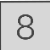

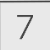

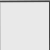

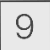

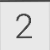

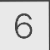

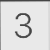

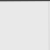

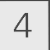

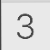

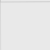

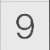

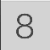

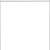

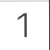

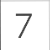

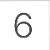

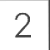

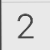

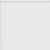

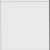

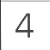

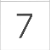

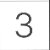

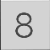

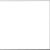

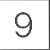

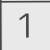

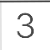

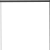

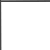

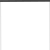

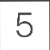

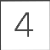

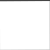

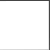

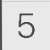

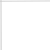

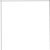

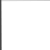

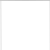

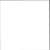

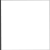

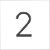

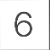

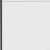

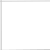

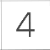

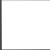

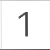

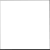

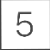

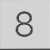

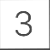

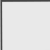

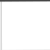

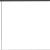

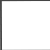

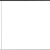

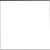

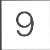

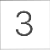

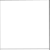

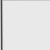

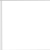

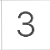

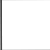

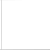

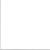

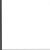

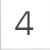

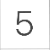

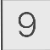

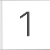

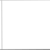

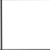

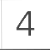

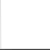

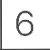

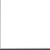

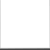

In [ ]:
for box in boxes:
  cv2_imshow(box)